In [8]:
import argparse
import logging
import numpy as np
import os
import random
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from PIL import Image
from pathlib import Path
from torch import optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils.preprocessing import align_datum
from evaluate import evaluate
from unet.unet_model import UNet
from utils.dice_score import dice_loss

In [3]:
img_size = 256

11 11


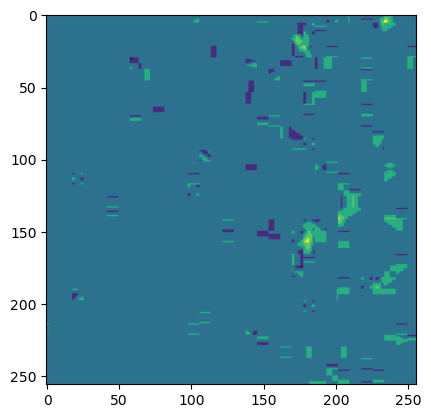

In [16]:
# Load the data
data_root = './data/photos/'
data_paths = [data_root + x for x in os.listdir(data_root) if x.find('.png') > 0]
mask_root = './data/Ground Truth Elastin/'
mask_paths = [mask_root + x for x in os.listdir(mask_root) if x.find('.png') > 0]
processed_data = './data/processed/inputs/'
processed_masks = './data/processed/masks/'

X = []
Y = []

for x, y in zip(data_paths, mask_paths):
    aligned = align_datum(x, y, size=img_size)
    for idx in range(len(aligned['i'])):
        filename = aligned['path'][idx].split('/')[-1].split('.')[0]
        data_name = filename + '_' + str(aligned['i'][idx]) + '-' + str(aligned['j'][idx]) + '.png'
        mask_name = 'gt_' + filename + '_' + str(aligned['i'][idx]) + '-' + str(aligned['j'][idx]) + '.png'

        X.append(processed_data + data_name)
        Y.append(processed_masks + mask_name)

        res = Image.fromarray(aligned['data'][idx] * 255, mode='RGB', )
        plt.imshow(aligned['data'][idx])
        plt.show()
        break
        res.save(processed_data + data_name)
        res = Image.fromarray(aligned['mask'][idx] * 255, mode='L')
        res.save(processed_masks + mask_name)

print(len(X), len(Y))
del aligned

In [7]:
os.listdir()

['.ipynb_checkpoints',
 'ETEnv',
 'EV0.7.ipynb',
 'evaluate.py',
 'unet',
 'utils',
 '__pycache__']

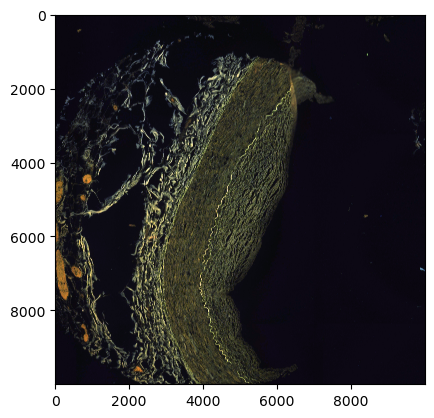

5000


In [5]:
from PIL import Image, ImageOps
size = (10000, 10000)
with Image.open("./data/photos/C-8.png") as im:
    plt.imshow(np.asarray(ImageOps.pad(im, size, color="#f00", centering = (0,0))))
    plt.show()
    print(len(np.asarray(im)))